In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###ETL###

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving dim_date.csv to dim_date.csv
Saving dim_hotels.csv to dim_hotels.csv
Saving dim_rooms.csv to dim_rooms.csv
Saving fact_aggregated_bookings.csv to fact_aggregated_bookings.csv
Saving fact_bookings.csv to fact_bookings.csv
Saving metrics_list.xlsx to metrics_list.xlsx


In [ ]:
import io
dim_date = pd.read_csv(io.BytesIO(uploaded['dim_date.csv']))
dim_hotels = pd.read_csv(io.BytesIO(uploaded['dim_hotels.csv']))
dim_rooms = pd.read_csv((io.BytesIO(uploaded['dim_rooms.csv'])))
fact_aggregated_bookings = pd.read_csv(io.BytesIO(uploaded['fact_aggregated_bookings.csv']))
fact_bookings = pd.read_csv(io.BytesIO(uploaded['fact_bookings.csv']))
metric_list = pd.read_excel(io.BytesIO(uploaded['metrics_list.xlsx']))

In [ ]:
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
fact_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [ ]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
metric_list.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Sno,Measuers,Description
1,1,Revenue,Sum of revenue_realized
2,2,Total Bookings,Count of booking_id in fact_bookings
3,3,Average Rating,Average of ratings_given
4,4,Total Capacity,Sum of capacity


In [ ]:
Updated_table = pd.merge(fact_bookings, dim_hotels, on='property_id')
Updated_table.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


###EDA###

In [ ]:
# prompt: city wise revenue generated

city_wise_revenue = Updated_table.groupby('city')['revenue_generated'].sum()/10000000
print(city_wise_revenue)
city_wise_revenue = pd.DataFrame(city_wise_revenue)
city_wise_revenue.reset_index(inplace=True)
city_wise_revenue

city
Bangalore    49.482818
Delhi        34.645184
Hyderabad    38.140085
Mumbai       78.486535
Name: revenue_generated, dtype: float64


,city,revenue_generated
0,Bangalore,49.482818
1,Delhi,34.645184
2,Hyderabad,38.140085
3,Mumbai,78.486535


<ipython-input-33-9cc9a13b926d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=city_wise_revenue, x='city', y='revenue_generated', ci=None, estimator=sum, palette='viridis', width=0.6)
<ipython-input-33-9cc9a13b926d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=city_wise_revenue, x='city', y='revenue_generated', ci=None, estimator=sum, palette='viridis', width=0.6)


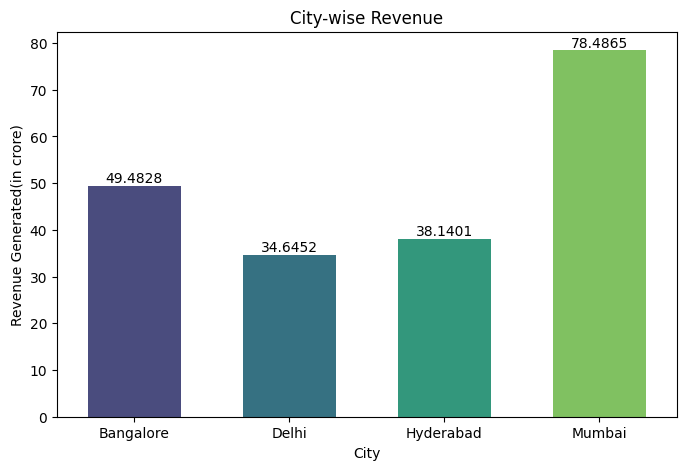

In [ ]:
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=city_wise_revenue, x='city', y='revenue_generated', ci=None, estimator=sum, palette='viridis', width=0.6)

plt.title('City-wise Revenue')
plt.xlabel('City')
plt.ylabel('Revenue Generated(in crore)')
for bars in barplot.containers: barplot.bar_label(bars)

Mumbai generated the highest revenue followed by Bangalore, Hyderabad and Delhi

In [ ]:
revenue_per_property = Updated_table.groupby('property_name')['revenue_generated'].sum()/10000000
print(revenue_per_property)
revenue_per_property = pd.DataFrame(revenue_per_property)
revenue_per_property.reset_index(inplace=True)
revenue_per_property

property_name
Atliq Bay        30.523421
Atliq Blu        30.663805
Atliq City       33.664715
Atliq Exotica    37.471122
Atliq Grands     24.875381
Atliq Palace     35.789651
Atliq Seasons     7.766527
Name: revenue_generated, dtype: float64


,property_name,revenue_generated
0,Atliq Bay,30.523421
1,Atliq Blu,30.663805
2,Atliq City,33.664715
3,Atliq Exotica,37.471122
4,Atliq Grands,24.875381
5,Atliq Palace,35.789651
6,Atliq Seasons,7.766527


<ipython-input-37-1477b786e292>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=revenue_per_property, x='property_name', y='revenue_generated', ci=None, estimator=sum, palette='Set2', width=0.6)
<ipython-input-37-1477b786e292>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=revenue_per_property, x='property_name', y='revenue_generated', ci=None, estimator=sum, palette='Set2', width=0.6)


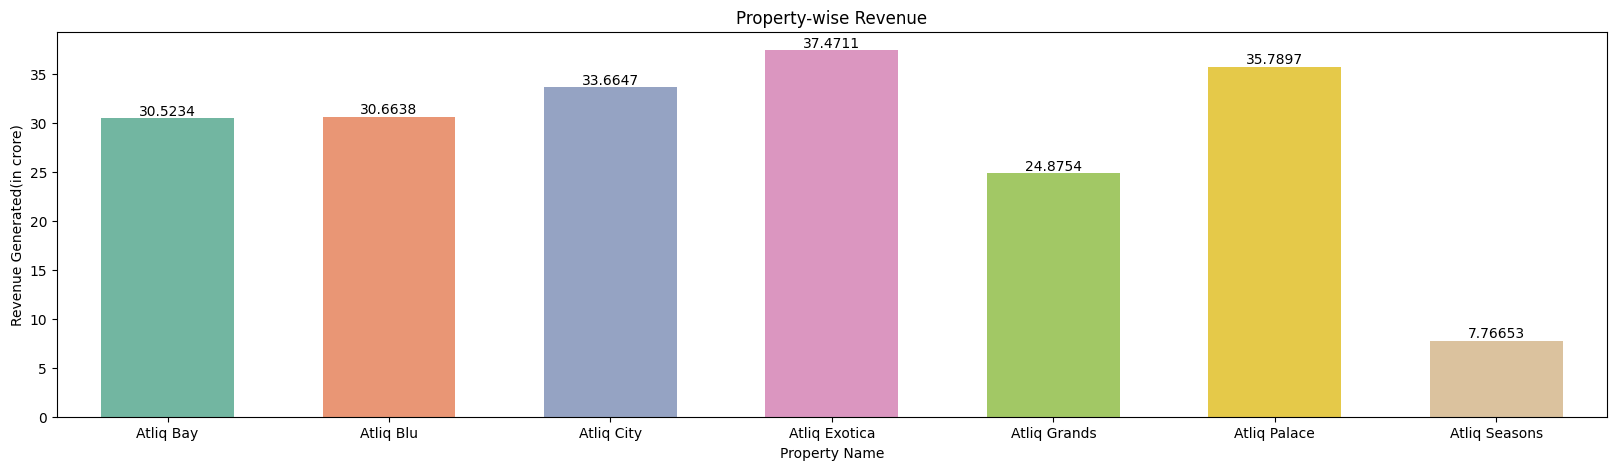

In [ ]:
plt.figure(figsize=(20, 5))
barplot = sns.barplot(data=revenue_per_property, x='property_name', y='revenue_generated', ci=None, estimator=sum, palette='Set2', width=0.6)

plt.title('Property-wise Revenue')
plt.xlabel('Property Name')
plt.ylabel('Revenue Generated(in crore)')
for bars in barplot.containers: barplot.bar_label(bars)

Highest revenue was generated by Atliq Exotica of 37.41 cr and Atliq Seasons generated the lowest revenue of 7.76 cr.

In [ ]:
Updated_table.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [ ]:
booking_platform_wise = Updated_table.groupby('booking_platform')['revenue_generated'].sum()/10000000
print(booking_platform_wise)
booking_platform_wise = pd.DataFrame(booking_platform_wise)
booking_platform_wise.reset_index(inplace=True)
booking_platform_wise

booking_platform
direct offline    10.135926
direct online     19.877003
journey           12.065471
logtrip           21.947896
makeyourtrip      40.150213
others            82.106662
tripster          14.471451
Name: revenue_generated, dtype: float64


,booking_platform,revenue_generated
0,direct offline,10.135926
1,direct online,19.877003
2,journey,12.065471
3,logtrip,21.947896
4,makeyourtrip,40.150213
5,others,82.106662
6,tripster,14.471451


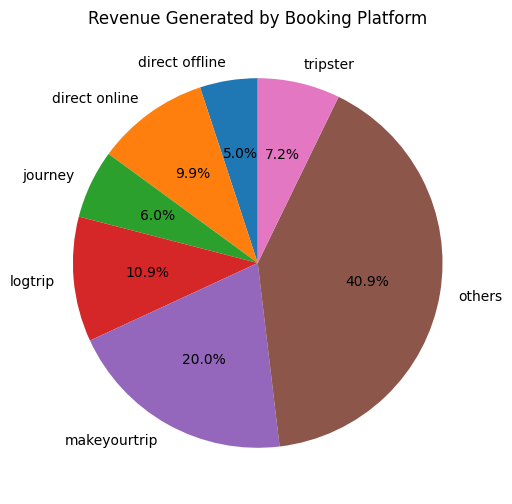

In [ ]:
import matplotlib.pyplot as plt

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(booking_platform_wise['revenue_generated'], labels=booking_platform_wise['booking_platform'], autopct='%1.1f%%', startangle=90)
_ = plt.title('Revenue Generated by Booking Platform')


Percent of booking per booking platform

<ipython-input-12-1f4132f8f394>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data = booking_platform_wise, x = 'booking_platform', y = 'revenue_generated', ci=None, estimator=sum, palette='coolwarm', width=0.6)
<ipython-input-12-1f4132f8f394>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data = booking_platform_wise, x = 'booking_platform', y = 'revenue_generated', ci=None, estimator=sum, palette='coolwarm', width=0.6)


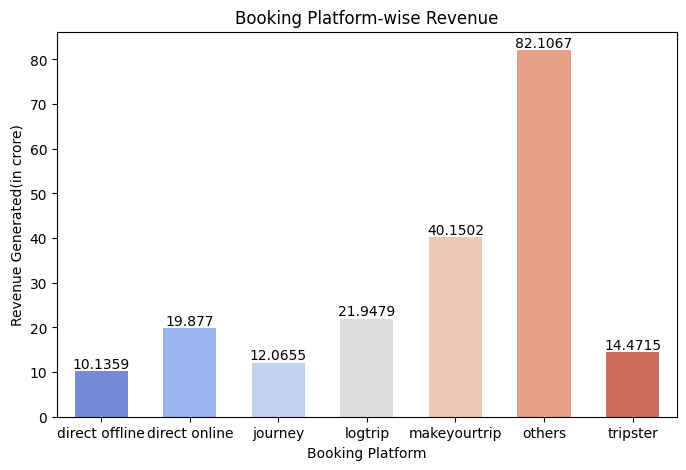

In [ ]:
plt.figure(figsize=(8,5))
barplot = sns.barplot(data = booking_platform_wise, x = 'booking_platform', y = 'revenue_generated', ci=None, estimator=sum, palette='coolwarm', width=0.6)

plt.title('Booking Platform-wise Revenue')
plt.xlabel('Booking Platform')
plt.ylabel('Revenue Generated(in crore)')
for bars in barplot.containers: barplot.bar_label(bars)

Other booking platform generated the highest revenue of 82cr and direct offline generated the lowest revenue of 10.13cr

In [ ]:
Updated_table.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77907
booking_status,0


In [ ]:
Updated_cleaned_table = Updated_table.dropna()
Updated_cleaned_table.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,0
booking_status,0


In [ ]:
customer_sentiments = (Updated_cleaned_table.groupby('property_name')['ratings_given'].mean().reset_index())
customer_sentiments.columns = ['property_name', 'average_rating']
print(customer_sentiments)
customer_sentiments = pd.DataFrame(customer_sentiments)
customer_sentiments.reset_index(inplace=True)
customer_sentiments

   property_name  average_rating
0      Atliq Bay        3.708929
1      Atliq Blu        3.959650
2     Atliq City        3.694799
3  Atliq Exotica        3.619241
4   Atliq Grands        3.099876
5   Atliq Palace        3.749545
6  Atliq Seasons        2.294856


,index,property_name,average_rating
0,0,Atliq Bay,3.708929
1,1,Atliq Blu,3.959650
2,2,Atliq City,3.694799
3,3,Atliq Exotica,3.619241
4,4,Atliq Grands,3.099876
5,5,Atliq Palace,3.749545
6,6,Atliq Seasons,2.294856


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Atliq Bay'),
  Text(1, 0, 'Atliq Blu'),
  Text(2, 0, 'Atliq City'),
  Text(3, 0, 'Atliq Exotica'),
  Text(4, 0, 'Atliq Grands'),
  Text(5, 0, 'Atliq Palace'),
  Text(6, 0, 'Atliq Seasons')])

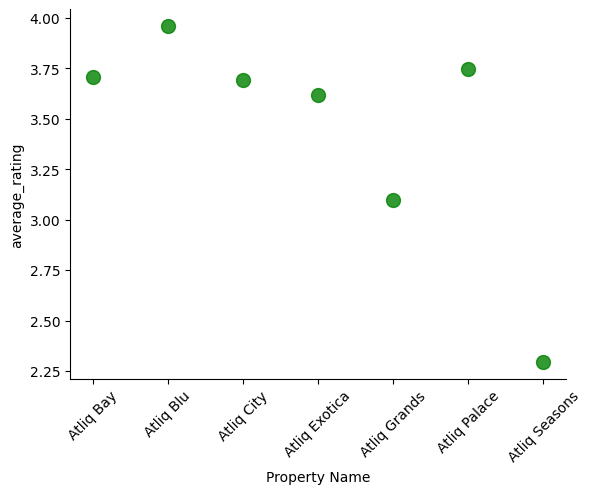

In [ ]:
# @title index vs average_rating

from matplotlib import pyplot as plt
customer_sentiments.plot(kind='scatter', x='property_name', y='average_rating', s=100, alpha=.8, c='g')
plt.xlabel('Property Name')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xticks(rotation=45)

Altiq Seasons received the lowest average rating of 2.29 and Atliq Blu received the highest rating of 3.95

In [ ]:
Updated_cleaned_table.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
9,May012216558RT110,16558,2022-04-28,2022-05-01,2022-05-02,1,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
booking_percentage_by_platform = Updated_cleaned_table.groupby('booking_platform').sum()
print(booking_percentage_by_platform)


                                                         booking_id  \
booking_platform                                                      
direct offline    May012216558RT26May022216558RT12May052216558RT...   
direct online     May012216558RT11May012216558RT15May012216558RT...   
journey           May022216558RT21May022216558RT28May022216558RT...   
logtrip           May012216558RT13May012216558RT112May012216558R...   
makeyourtrip      May012216558RT111May012216558RT113May022216558...   
others            May012216558RT16May012216558RT110May012216558R...   
tripster          May032216558RT25May032216558RT28May052216558RT...   

                  property_id  \
booking_platform                
direct offline       51282639   
direct online       101464136   
journey              62615247   
logtrip             112954014   
makeyourtrip        204215188   
others              417663873   
tripster             73405470   

                                                       booking